# Keras - MNIST example with a covnet
by: Keras Team (adaptations by Mijael Martinez)

Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Using TensorFlow backend.


## Load data

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


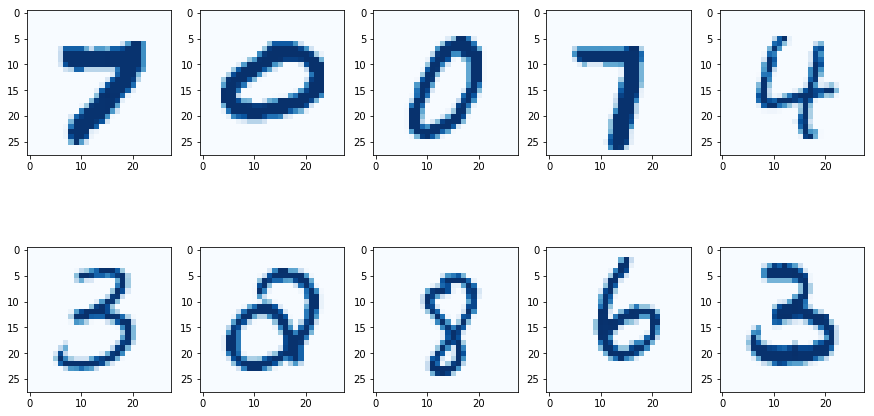

In [8]:
sample = np.arange(x_train.shape[0])
np.random.shuffle(sample)
sample = sample[0:10]
fig=plt.figure(figsize=(15, 8))
for i in range(10):
    fig.add_subplot(2, 5, i+1, aspect='equal')
    plt.imshow(np.array(x_train[sample[i]]).reshape((28,28)), cmap="Blues")

## Create model

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compile

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train

In [11]:
# Trained MNIST with Keras.h5
import os.path
if os.path.isfile('Trained MNIST with Keras.h5'):
    model = load_model('Trained MNIST with Keras.h5')
else:
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028283286225694974
Test accuracy: 0.9909


## Make a few predictions

10/10 [==============================] - 0s 785us/step


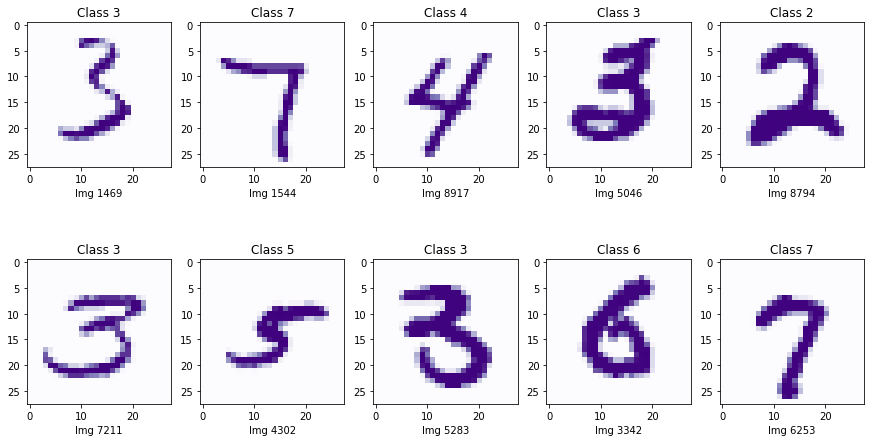

In [13]:
sample = np.arange(x_test.shape[0])
np.random.shuffle(sample)
sample = sample[0:10]

results = np.round(model.predict(x_test[sample], verbose=1), decimals=2)
resultLabels = np.argmax(results, axis=1)

fig=plt.figure(figsize=(15, 8))
for i in range(10):
    fig.add_subplot(2, 5, i+1, aspect='equal')
    plt.imshow(np.array(x_test[sample[i]]).reshape((28,28)), cmap="Purples")
    plt.title('Class {}'.format(resultLabels[i]))
    plt.xlabel("Img {}".format(sample[i]))

## Extra: Visualize the network structure.
#### (This is how much Keras does for us.)

In [14]:
if True:
    tbCallback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, batch_size=32, write_graph=False, 
                                write_grads=False, write_images=True, embeddings_freq=0, 
                                embeddings_layer_names=None, embeddings_metadata=None)

    model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=1,
                  verbose=1,
                  validation_data=(x_test, y_test),
                  callbacks=[tbCallback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0269 - val_acc: 0.9914


In [ ]:
#model.save("Trained MNIST with Keras.h5")